**Homework 2 Template**

Make a copy of this and save as "hw2_name.ipynb"

Name: Jamison Wolsborn  
Comments for instructor: I spent several hours on this, it was all very enjoyable. I love this class but it is very difficult so far. 

**Exercise 2.10**

In nuclear physics, the semi-empirical mass formula is a formula for calculating the approximate nuclear binding energy _B_ of an atmoic nucleus with atomic number _Z_ and mass number _A_:

$B = a_{1}A - a_{2}A^{2/3} - a_{3}\frac{Z^2}{A^{1/3}} - a_{4}\frac{(A-2Z)^{2}}{A} + \frac{a_{5}}{A^{1/2}}, $

where, in units of millions of electron volts, the constants are $a_{1}$ = 15.8, $a_{2}$ = 18.3, $a_{3}$ = 0.714, $a_{4}$ = 23.
2, and

\begin{equation*}
a_{5} = \begin{cases}
            0 \quad &\text{if A is odd,} \\
            12.0 \quad &\text{if A and Z are both even,} \\
            -12.0 \quad &\text{if A is even and Z is odd.} \\
        \end{cases}
\end{equation*}

**a)** Write a program that takes as its input the values of _A_ and _Z_, and prints out the binding
energy for the corresponding atom. Use your program to find the binding energy of an
atom with _A_ = 58 and _Z_ = 28. (Hint: The correct answer is around 490 MeV.)

In [44]:
import numpy as np

A = int(input('A: ')) #asks user for value of A
Z = int(input('Z: ')) #asks user for value of Z
a1 = 15.8
a2 = 18.3
a3 = 0.714
a4 = 23.2

if A%2 == 1: #if A is odd
    a5 = 0
elif A%2 == 0 and Z%2 == 0: #if A and Z are even
    a5 = 12
elif A%2 == 0 and Z%2 == 1: #if A is even and Z is odd
    a5 = -12

def get_B(A,Z): #set as a function to call back later
    return a1*A - a2*A**(2/3) - a3*Z**2/A**(1/3) - a4*(A-2*Z)**2/A + a5/A**(1/2)

print(get_B(A,Z),"MeV")

A: 58
Z: 28
497.5620206224374 MeV


**b)** Modify your program to print out not the total binding energy B, but the binding energy
per nucleon, which is B/A.

In [46]:
binding_energy_per_nucleon = get_B(A,Z)/A #this is why I called the function get_B

print(round(binding_energy_per_nucleon, 4)) #not completely sure of what units to add

8.5787


**c)** Now modify your program so that it takes as input just a single value of the atomic
number Z and then goes through all values of A from A = Z to A = 3Z, to find the one
that has the largest binding energy per nucleon. This is the most stable nucleus with the
given atomic number. Have your program print out the value of A for this most stable
nucleus and the value of the binding energy per nucleon.


In [6]:
Z = int(input("Z: ")) 
best_A = [Z]
best_B = []
i = 0

while best_A[-1] < 3*Z: #while the latest Z value of best_A is less than 3*Z
    best_A.append(best_A[i] + 1) 
    i +=1

for i in best_A:
    best_B.append(get_B(i,Z)/i)
    
print("Most Stable A: ", best_A[best_B.index(max(best_B))]) #value of the location of the maximum Z of best_B
print("Most Stable B per nucleon: ", max(best_B)) #maximum value of best_B

Z: 28
Most Stable A:  63
Most Stable B per nucleon:  8.705473823595044


**d)** Modify your program again so that, instead of taking Z as input, it runs through all
values of Z from 1 to 100 and prints out the most stable value of A for each one. At what
value of Z does the maximum binding energy per nucleon occur? (The true answer, in
real life, is Z = 28, which is nickel. You should find that the semi-empirical mass formula
gets the answer roughly right, but not exactly.)

In [47]:
import numpy as np

best_Z = np.linspace(1,100,100)
Z = []
A = []
B = []
for i in best_Z: #incrementing from 0 to 100
    best_A2 = [i] 
    best_B2 = []
    j = 0
    
    while best_A2[-1] < 3*i: #while Z is no greater than 3*Z
        best_A2.append(best_A2[j] +1) 
        j += 1
    #very similar to previous algorithm with main differnece being a double for loop
    for k in best_A2:
        best_B2.append(get_B(k,i)/k)

    Z.append(i) #Z is just 1 - 100
    A.append(best_A2[best_B2.index(max(best_B2))]) #A is the value of the location of the best value of B in the given A
    B.append(max(best_B2)) #B is just the best value of B in the given A
    print("Z:",i,"| A:",best_A2[best_B2.index(max(best_B2))],"| B:", round(max(best_B2),4))

print("The maximum binding energy happens at",Z[B.index(max(B))])

Z: 1.0 | A: 2.0 | B: 5.2346
Z: 2.0 | A: 4.0 | B: 5.3219
Z: 3.0 | A: 6.0 | B: 5.9562
Z: 4.0 | A: 9.0 | B: 6.5501
Z: 5.0 | A: 11.0 | B: 6.979
Z: 6.0 | A: 13.0 | B: 7.295
Z: 7.0 | A: 15.0 | B: 7.5374
Z: 8.0 | A: 17.0 | B: 7.7285
Z: 9.0 | A: 20.0 | B: 7.8951
Z: 10.0 | A: 22.0 | B: 8.0354
Z: 11.0 | A: 24.0 | B: 8.1487
Z: 12.0 | A: 26.0 | B: 8.2412
Z: 13.0 | A: 29.0 | B: 8.3178
Z: 14.0 | A: 31.0 | B: 8.3897
Z: 15.0 | A: 33.0 | B: 8.4485
Z: 16.0 | A: 35.0 | B: 8.4965
Z: 17.0 | A: 38.0 | B: 8.5358
Z: 18.0 | A: 40.0 | B: 8.5734
Z: 19.0 | A: 42.0 | B: 8.6035
Z: 20.0 | A: 44.0 | B: 8.6272
Z: 21.0 | A: 47.0 | B: 8.6474
Z: 22.0 | A: 49.0 | B: 8.6652
Z: 23.0 | A: 51.0 | B: 8.6782
Z: 24.0 | A: 54.0 | B: 8.6873
Z: 25.0 | A: 56.0 | B: 8.6962
Z: 26.0 | A: 58.0 | B: 8.7014
Z: 27.0 | A: 60.0 | B: 8.7034
Z: 28.0 | A: 63.0 | B: 8.7055
Z: 29.0 | A: 65.0 | B: 8.7048
Z: 30.0 | A: 68.0 | B: 8.7016
Z: 31.0 | A: 70.0 | B: 8.6987
Z: 32.0 | A: 72.0 | B: 8.6934
Z: 33.0 | A: 75.0 | B: 8.6866
Z: 34.0 | A: 77.0 | B: 8.

**Pts /20**

**Exercise 2.12**

The program in Example 2.8 is not a very efficient way of
calculating prime numbers: it checks each number to see if it is divisible
by any number less than it.  We can develop a much faster program for prime
numbers by making use of the following observations:

**a)** A number $n$ is prime if it has no prime factors less than $n$.
  Hence we only need to check if it is divisible by other primes.
  
**b)** If a number $n$ is non-prime, having a factor $r$, then $n=rs$, where
  $s$ is also a factor.  If $r\ge\sqrt{n}$ then $n = rs \ge \sqrt{n}s$,
  which implies that $s\le\sqrt{n}$.  In other words, any non-prime must
  have factors, and hence also prime factors, less than or equal
  to $\sqrt{n}$.  Thus to determine if a number is prime we have to check
  its prime factors only up to and including $\sqrt{n}$ --- if there are none
  then the number is prime.
  
**c)** If we find even a single prime factor less than $\sqrt{n}$ then we
  know that the number is non-prime, and hence there is no need to check
  any further --- we can abandon this number and move on to something else.

Write a Python program that finds all the primes up to ten thousand.
Create a list to store the primes, which starts out with just the one prime
number 2 in it.  Then for each number $n$ from 3 to $10\,000$ check whether
the number is divisible by any of the primes in the list up to and
including $\sqrt{n}$.  As soon as you find a single prime factor you can
stop checking the rest of them---you know $n$ is not a prime.  If you find
no prime factors $\sqrt{n}$ or less then $n$ is prime and you should add it
to the list.  You can print out the list all in one go at the end of the
program, or you can print out the individual numbers as you find them.


In [76]:
import numpy as np

primes = [2]
n = 3

def is_prime(n):
    for i in range(2, int(math.sqrt(n)) + 1): #interates from 2 to the sqrt of n
        if n % i == 0: #if n is divisible by any previous prime then it is false
            return False
    return True #if it is not divisible by any prime, then return true

while n <= 10000: 
    if is_prime(n): #if n is a prime number
        primes.append(n) #add it to the list of primes
    n += 1

print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

**Pts /10**

**Exercise 3.2**

Although the $plot$ function is designed primarily for
plotting standard $xy$ graphs, it can be adapted for other kinds of
plotting as well.

**a)** Make a plot of the so-called _deltoid_ curve, which is
  defined parametrically by the equations
  
\begin{equation*}
x = 2 \cos \theta + \cos 2\theta, \qquad 
y = 2 \sin \theta - \sin 2\theta,
\end{equation*}

where $0\le\theta<2\pi$.  Take a set of values of $\theta$ between zero
and $2\pi$ and calculate $x$ and $y$ for each from the equations above,
then plot $y$ as a function of $x$.


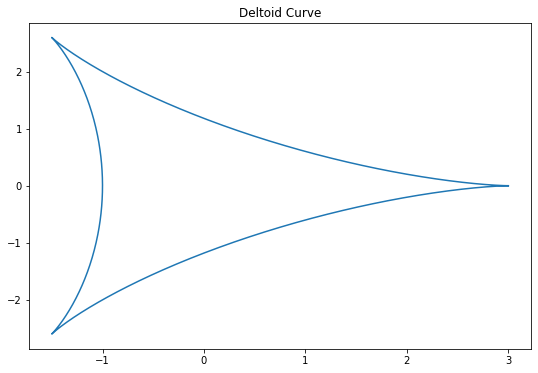

In [44]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0,2*np.pi,1000) #1000 steps seemed like enough
x = 2*np.cos(theta) + np.cos(2*theta)
y = 2*np.sin(theta) - np.sin(2*theta)

plt.figure(figsize=(9,6)) #wanted to make it bigger
plt.title("Deltoid Curve") #add a title just for good measure
plt.plot(x,y)


**b)** Taking this approach a step further, one can make a polar
  plot $r=f(\theta)$ for some function $f$ by calculating $r$ for a range
  of values of $\theta$ and then converting $r$ and $\theta$ to Cartesian
  coordinates using the standard equations $x = r\cos\theta$, $y =
  r\sin\theta$.  Use this method to make a plot of the Galilean
  spiral $r = \theta^2$ for $0\le\theta\le10\pi$.

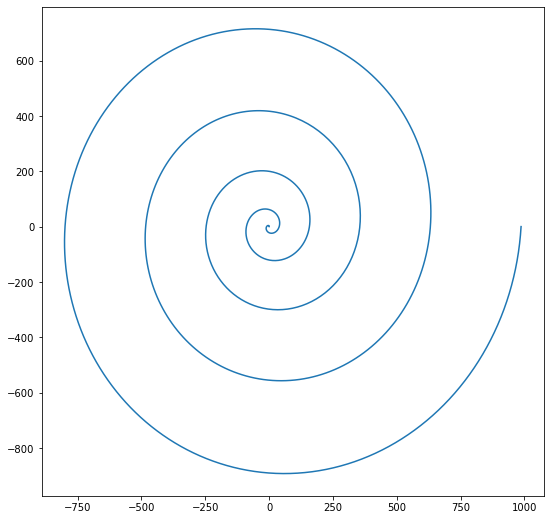

In [48]:
import numpy as np
import matplotlib.pyplot as plt
#not much to comment, self explanatory
theta = np.linspace(0,10*np.pi,1000)
r = theta**2
x = r*np.cos(theta)
y = r*np.sin(theta)

plt.figure(figsize=(9,9))
plt.plot(x,y)

**c)** Using the same method, make a polar plot of ''Fey's
  function''

\begin{equation*}
r = e^{\cos\theta} - 2 \cos 4\theta + \sin^5 \frac{\theta}{12}
\end{equation*}

in the range $0\le\theta\le24\pi$.

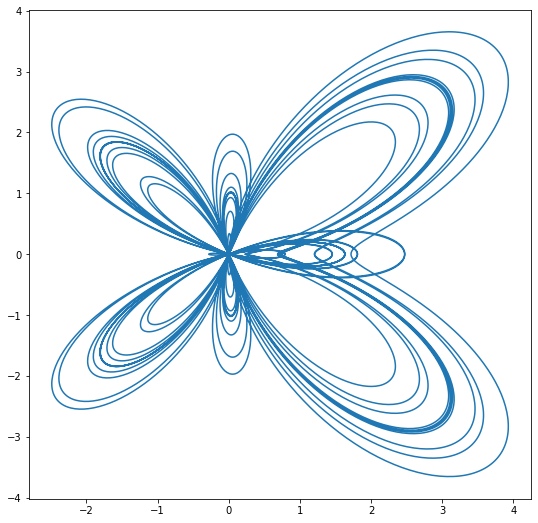

In [46]:
import numpy as np
import matplotlib.pyplot as plt
#not much to comment here, pretty self explanatory
theta = np.linspace(0,24*np.pi,10000)
r = np.exp(np.cos(theta)) - 2*np.cos(4*theta) + np.sin(theta/12)**5
x = r*np.cos(theta)
y = r*np.sin(theta)

plt.figure(figsize=(9,9))
plt.plot(x,y) 

**Pts /15**

**Exercise 3.4**

Using the program from Example 3.2 as a starting point, or
starting from scratch if you prefer, do the following:

**a)** A sodium chloride crystal has sodium and chlorine atoms
  arranged on a cubic lattice but the atoms alternate between sodium and
  chlorine, so that each sodium is surrounded by six chlorines and each
  chlorine is surrounded by six sodiums.  Create a visualization of the
  sodium chloride lattice using two different colors to represent the two
  types of atoms.

**b)** The face-centered cubic (fcc) lattice, which is the most common
  lattice in naturally occurring crystals, consists of a cubic lattice with
  atoms positioned not only at the corners of each cube but also at the
  center of each face (See image from text). Create a visualization of an fcc lattice with a single species of atom
(such as occurs in metallic iron, for instance).

**Pts /10**

**Exercise 3.5**

 The innermost six planets of our solar system revolve around the
Sun in roughly circular orbits that all lie approximately in the same
(ecliptic) plane.  Check your textbook for a table of some basic parameters. 

Using the facilities provided by the visual package, create an
animation of the solar system that shows the following:

**a)** The Sun and planets as spheres in their appropriate positions and
  with sizes proportional to their actual sizes.  Because the radii of the
  planets are tiny compared to the distances between them, represent the
  planets by spheres with radii $c_1$ times larger than their correct
  proportionate values, so that you can see them clearly.  Find a good
  value for $c_1$ that makes the planets visible.  You'll also need to find
  a good radius for the Sun.  Choose any value that gives a clear
  visualization.  (It doesn't work to scale the radius of the Sun by the
  same factor you use for the planets, because it'll come out looking much
  too large.  So just use whatever works.)  For added realism, you may also
  want to make your spheres different colors.  For instance, Earth could be
  blue and the Sun could be yellow.
  
  **b)** The motion of the planets as they move around the Sun (by making the
  spheres of the planets move).  In the interests of alleviating boredom,
  construct your program so that time in your animation runs a factor of
  $c_2$ faster than actual time.  Find a good value of $c_2$ that makes the
  motion of the orbits easily visible but not unreasonably fast.  Make use
  of the \verb|rate| function to make your animation run smoothly.
  
  Hint: You may find it useful to store the sphere variables representing the
planets in an array of the kind described on page 115.

**Pts /10**

**Exercise 3.7**

The Mandelbrot set, named after its discoverer, the French
mathematician Benoit Mandelbrot, is a _fractal_, an infinitely
ramified mathematical object that contains structure within structure
within structure, as deep as we care to look.  The definition of the
Mandelbrot set is in terms of complex numbers as follows. Consider the equation:

\begin{equation*}
z' = z^2 + c,
\end{equation*}

where $z$ is a complex number and $c$ is a complex constant.  For any given
value of $c$ this equation turns an input number $z$ into an output
number $z'$.  The definition of the Mandelbrot set involves the repeated
iteration of this equation: we take an initial starting value of $z$ and
feed it into the equation to get a new value $z'$.  Then we take that value
and feed it in again to get another value, and so forth.  The Mandelbrot
set is the set of points in the complex plane that satisfies the following
definition:

_For a given complex value of $c$, start with $z=0$ and iterate
repeatedly.  If the magnitude $|z|$ of the resulting value is ever greater
than 2, then the point in the complex plane at position $c$ is $not$
in the Mandelbrot set, otherwise it is in the set._

In order to use this definition one would, in principle, have to iterate
infinitely many times to prove that a point is in the Mandelbrot set, since
a point is in the set only if the iteration never passes $|z|=2$ ever.  In
practice, however, one usually just performs some large number of
iterations, say 100, and if $|z|$ hasn't exceeded 2 by that point then we
call that good enough.

Write a program to make an image of the Mandelbrot set by performing the
iteration for all values of $c=x+iy$ on an $N\times N$ grid spanning the
region where $-2\le x\le 2$ and $-2\le y\le 2$.  Make a density plot in
which grid points inside the Mandelbrot set are colored black and those
outside are colored white.  The Mandelbrot set has a very distinctive shape
that looks something like a beetle with a long snout---you'll know it when
you see it.

Hint: You will probably find it useful to start off with quite a coarse
grid, i.e., with a small value of $N$---perhaps $N=100$---so that your
program runs quickly while you are testing it.  Once you are sure it is
working correctly, increase the value of $N$ to produce a final
high-quality image of the shape of the set.

If you are feeling enthusiastic, here is another variant of the same
exercise that can produce amazing looking pictures.  Instead of coloring
points just black or white, color points according to the number of
iterations of the equation before $|z|$ becomes greater than 2 (or the
maximum number of iterations if $|z|$ never becomes greater than 2).  If
you use one of the more colorful color schemes Python provides for density
plots, such as the ''hot'' or ''jet'' schemes, you can make
some spectacular images this way.  Another interesting variant is to color
according to the logarithm of the number of iterations, which helps reveal
some of the finer structure outside the set.



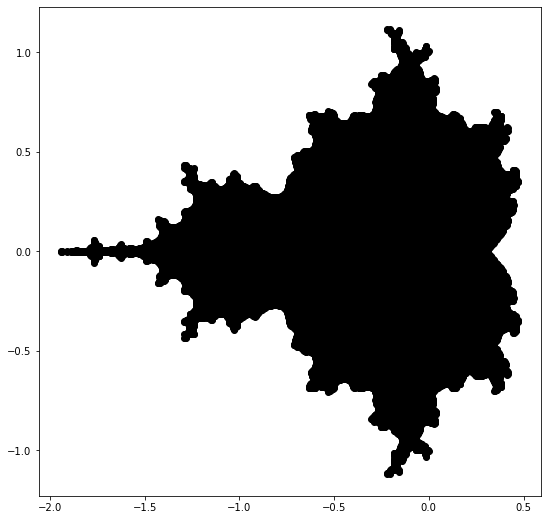

In [42]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,1000)
y = np.linspace(-2,2,1000)
x_axis = []
y_axis = []

def mandelbrot(c):
    z = 0
    for i in range(10): #iterate the calculation of z for 10 times
        z = z**2 + c 
    return z

for i in x:
    for j in y: 
        c = i + 1j * j #calculate the values of c
        m = mandelbrot(c)
        if abs(m) < 2: #as long as z never goes beyond 2 or -2
            x_axis.append(i) #append the x values to x_axis
            y_axis.append(j) #append the y values to y_axis
            #I'm sure 1 line of code here would let me make this into a density plot
            
plt.figure(figsize=(9,9))
plt.scatter(x_axis, y_axis, color = 'black') #I tried to make this into a density plot but was unable to get it to work


**Pts /10**

**Exercise 3.8**

It's a common situation in physics that an experiment produces data
that lies roughly on a straight line. Check the figure in your textbook for an example.

The solid line here represents the underlying straight-line form, which we
usually don't know, and the points representing the measured data lie
roughly along the line but don't fall exactly on it, typically because of
measurement error.

The straight line can be represented in the familiar form $y=mx+c$ and a
frequent question is what the appropriate values of the slope $m$ and
intercept $c$ are that correspond to the measured data.  Since the data
don't fall perfectly on a straight line, there is no perfect answer to such
a question, but we can find the straight line that gives the best
compromise fit to the data.  The standard technique for doing this is the
_method of least squares_.

Suppose we make some guess about the parameters $m$ and $c$ for the
straight line.  We then calculate the vertical distances between the data
points and that line, as represented by the short vertical lines in the
figure, then we calculate the sum of the squares of those distances, which
we denote $\chi^2$.  If we have $N$ data points with
coordinates $(x_i,y_i)$, then $\chi^2$ is given by:

\begin{equation*}
\chi^2 = \sum_{i=1}^N (mx_i+c-y_i)^2
\end{equation*}

The least-squares fit of the straight line to the data is the straight line
that minimizes this total squared distance from data to line.  We find the
minimum by differentiating with respect to both $m$ and~$c$ and setting the
derivatives to zero, which gives

\begin{equation*}
m\sum_{i=1}^N x_i^2 + c\sum_{i=1}^N x_i - \sum_{i=1}^N x_iy_i = 0 , \\
m\sum_{i=1}^N x_i + cN - \sum_{i=1}^N y_i = 0.
\end{equation*}

For convenience, let us define the following quantities:

\begin{equation*}
E_x = {1\over N} \sum_{i=1}^N x_i,\qquad
E_y = {1\over N} \sum_{i=1}^N y_i,\qquad
E_{xx} = {1\over N} \sum_{i=1}^N x_i^2,\qquad
E_{xy} = {1\over N} \sum_{i=1}^N x_iy_i,
\end{equation*}

in terms of which our equations can be written

\begin{equation*}
mE_{xx} + cE_x = E_{xy}\,, \\
mE_x + c = E_y\,.
\end{equation*}

Solving these equations simultaneously for $m$ and $c$ now gives

\begin{equation*}
m = {E_{xy}-E_x E_y\over E_{xx} - E_x^2},\qquad
c = {E_{xx}E_y-E_x E_{xy}\over E_{xx} - E_x^2}.
\end{equation*}

These are the equations for the least-squares fit of a straight line to $N$
data points.  They tell you the values of $m$ and $c$ for the line that
best fits the given data.

**a)** In the on-line resources you will find a file called
  _millikan.txt_.  The file contains two columns of numbers, giving
  the $x$ and $y$ coordinates of a set of data points.  Write a program to
  read these data points and make a graph with one dot or circle for each
  point.

Approximate value for h = 6.5493e-34 J s


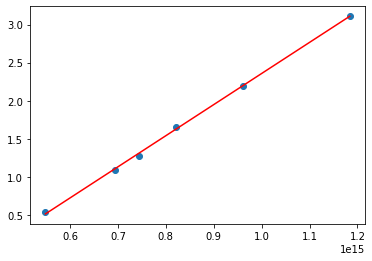

In [29]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('millikan.txt')
x = data[:, 0] #values in first column (frequency)
y = data[:, 1] #values of the second column (voltage)
N = x.size #size or length of x, could have also just called it 6
e = 1.602e-19 #charge of an electron

E_x = 1/N * sum(x) #sum of x divided by N
E_y = 1/N * sum(y) #sum of y divided by N
E_xx = 1/N * sum(x**2) #sum of x**2 divided by N
E_xy = 1/N * dot(x, y)
m = (Exy - Ex * Ey)/(Exx - Ex**2) #plug and play with equations
c = (Exx * Ey - Ex * Exy)/(Exx - Ex**2)

new_y = np.empty(N, float) #establish the new y values for the best fit line
for i in range(0, N): #values from 0 to 5
    new_y[i] = m * x[i] + c #make an array of least square fitted data

print("Approximate value for h = {:.4e} J s".format(m*e)) #value of plancks constant is just m*e

plt.scatter(x, y)
plt.plot(x, new_y, color = 'red')


**b)** Add code to your program, before the part that makes the graph, to
  calculate the quantities $E_x$, $E_y$, $E_{xx}$, and $E_{xy}$ defined
  above, and from them calculate and print out the slope $m$ and
  intercept $c$ of the best-fit line.

In [ ]:
#Also part of the main program up top
E_x = 1/N * sum(x) 
E_y = 1/N * sum(y)
E_xx = 1/N * sum(x**2)
E_xy = 1/N * dot(x, y)
m = (Exy - Ex * Ey)/(Exx - Ex**2)
c = (Exx * Ey - Ex * Exy)/(Exx - Ex**2)

**c)** Now write code that goes through each of the data points in turn and
  evaluates the quantity $mx_i+c$ using the values of $m$ and $c$ that you
  calculated.  Store these values in a new array or list, and then graph
  this new array, as a solid line, on the same plot as the original data.
  You should end up with a plot of the data points plus a straight line
  that runs through them.

In [ ]:
#Also part of the main program
plt.scatter(x, y)
plt.plot(x, new_y, color = 'red')

**d)** The data in the file _millikan.txt_ are taken from a historic
  experiment by Robert Millikan that measured the
  _photoelectric effect_.  When light of an appropriate wavelength is
  shone on the surface of a metal, the photons in the light can strike
  conduction electrons in the metal and, sometimes, eject them from the
  surface into the free space above.  The energy of an ejected electron is
  equal to the energy of the photon that struck it minus a small
  amount $\phi$ called the _work function_ of the surface,
  which represents the energy needed to remove an electron from the
  surface.  The energy of a photon is $h\nu$, where $h$ is Planck's
  constant and $\nu$ is the frequency of the light, and we can measure the
  energy of an ejected electron by measuring the voltage~$V$ that is just
  sufficient to stop the electron moving.  Then the voltage, frequency, and
  work function are related by the equation
  
  \begin{equation*}
  V = {h\over e}\nu - \phi,
  \end{equation*}
  
  where $e$ is the charge on the electron.  This equation was first given by
Albert Einstein in 1905.

The data in the file _millikan.txt_ represent frequencies $\nu$ in
hertz (first column) and voltages $V$ in volts (second column) from
photoelectric measurements of this kind.  Using the equation above and the
program you wrote, and given that the charge on the electron is
$1.602\times10^{-19}\,$C, calculate from Millikan's experimental data a
value for Planck's constant.  Compare your value with the accepted value of
the constant, which you can find in books or on-line.  You should get a
result within a couple of percent of the accepted value.

This calculation is essentially the same as the one that Millikan himself
used to determine of the value of Planck's constant, although, lacking a
computer, he fitted his straight line to the data by eye.  In part for this
work, Millikan was awarded the Nobel prize in physics in 1923.

In [ ]:
#also part of the main program
print("Approximate value for h = {:.4e} J s".format(m*e))

**Pts /20**

**Total Pts /95**